In [1]:
#Cell 1 of homework

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#Cell 2 of homework

import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
#Cell 3 of homework

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta

In [4]:
#Cell 4 of homework

# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#Cell 5 of homework

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
#Cell 6 of homework

# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
#Cell 7 of homework

# Save references to each table
station=Base.classes.station
measurement=Base.classes.measurement

In [8]:
#Cell 8 of homework

# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#Cell 9 of homework

# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

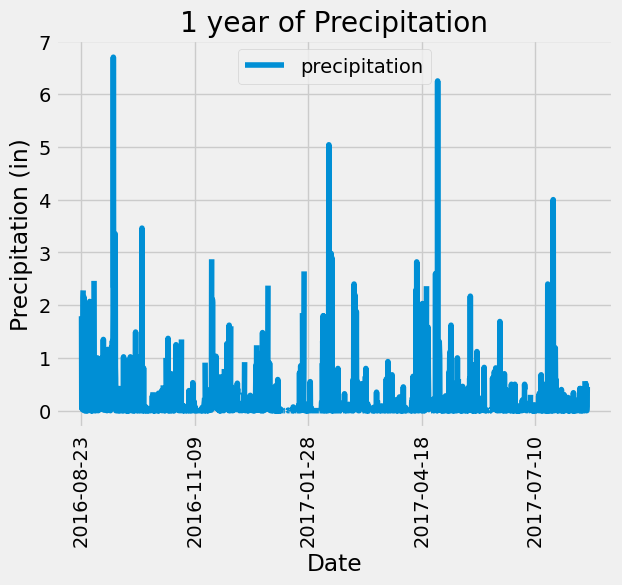

In [10]:
#Cell 10 of homework

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

recentdate=session.query(measurement.date).order_by(measurement.date.desc()).first()[0]

# Calculate the date one year from the last date in data set. changed to 366 days to match 2016-08-23 starting dat of graph

year=dt.datetime.strptime(recentdate,'%Y-%m-%d') - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores

precipitationdata=session.query(measurement.date, measurement.prcp).filter(measurement.date>=year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_df=pd.DataFrame(precipitationdata, columns=['date', 'precipitation'])

# Sort the dataframe by date

precipitation_df=precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='date', y='precipitation', title="1 year of Precipitation", rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.tight_layout;


In [11]:
#Cell 11 of homework

# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploration Station Analysis

In [12]:
# checking if cell 12's question is from the previous database. it was not...

precipitation_df.head()

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


In [13]:
#Cell 12 of homework

# Design a query to calculate the total number of stations in the dataset
stations=session.query(func.count(measurement.station.distinct())).all()
stations

[(9,)]

In [14]:
#Cell 13 of homework

# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stationcount=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stationcount

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
#Cell 14 of homework

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp=session.query(func.min(measurement.tobs)).filter(measurement.station=='USC00519281').scalar()
max_temp=session.query(func.max(measurement.tobs)).filter(measurement.station=='USC00519281').scalar()
avg_temp=session.query(func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').scalar()
print(min_temp,max_temp,avg_temp)

54.0 85.0 71.66378066378067


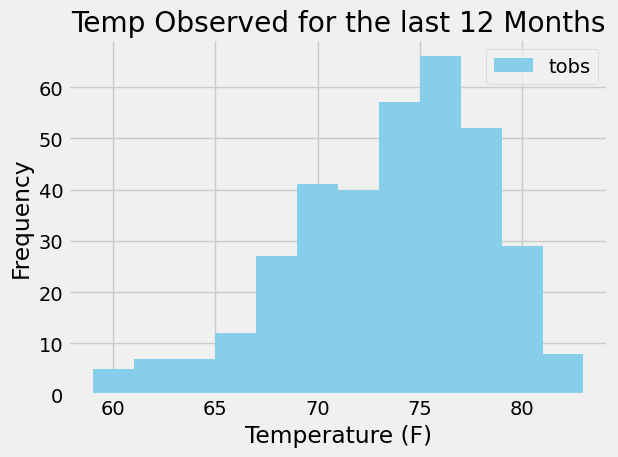

In [16]:
#Cell 15 of homework
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
latestdate=session.query(func.max(measurement.date)).scalar()
latest=dt.datetime.strptime(latestdate,'%Y-%m-%d')
prioryear=latest-dt.timedelta(days=365)
prioryear_str=prioryear.strftime('%y-%m-%d')
activestation=session.query(measurement.date,measurement.tobs).filter(measurement.station=='USC00519281').filter(measurement.date>=prioryear).filter(measurement.date<=latest).all()
active_df=pd.DataFrame(activestation,columns=['date','temperature'])

#plotting the histogram

plt.hist(active_df['temperature'], bins=12, color='skyblue',label='tobs')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temp Observed for the last 12 Months')
plt.legend()
plt.tight_layout();

# Close Session

In [17]:
#Cell 16 

# Close Session
session.close()